# Gym Crowdedness Analysis with PCA

> # Objective : 

To **predict** how crowded a university gym would be at a given time of day (and some other features, including weather)

> # Data Decription : 

The dataset consists of 26,000 people counts (about every 10 minutes) over one year. The dataset also contains information about the weather and semester-specific information that might affect how crowded it is. The label is the number of people, which has to be predicted given some subset of the features.

**Label**:

- Number of people

**Features**:

     1. date (string; datetime of data)
     2. timestamp (int; number of seconds since beginning of day)
     3. dayofweek (int; 0 [monday] - 6 [sunday])
     4. is_weekend (int; 0 or 1) [boolean, if 1, it's either saturday or sunday, otherwise 0]
     5. is_holiday (int; 0 or 1) [boolean, if 1 it's a federal holiday, 0 otherwise]
     6. temperature (float; degrees fahrenheit)
     7. isstartof_semester (int; 0 or 1) [boolean, if 1 it's the beginning of a school semester, 0 otherwise]
     8. month (int; 1 [jan] - 12 [dec])
     9. hour (int; 0 - 23)

> # Approach

The model would be built and PCA would be implemented in the following way : 

- **Data Cleaning and PreProcessing**
- **Exploratory Data Analysis :**
  
      - Uni-Variate Analysis : Histograms , Distribution Plots
      - Bi-Variate Analysis : Pair Plots
      - Correlation Matrix
      
- **Processing :**
      
      - OneHotEncoding 
      - Feature Scaling : Standard Scaler

- **Splitting Dataset** 
- **Principal Component Analysis**
- **Modelling : Random Forest**

      - Random forest without PCA
      - Random Forest with PCA
      
- **Conclusion**

## `1` Data Cleaning and PreProcessing 

**Importing Libraries and loading Dataset**

In [1]:
import numpy as np # linear algebra
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv(r'C:\Users\kusht\OneDrive\Desktop\Excel-csv\PCA analysis.csv') #Replace it with your path where the data file is stored
df.head()

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,2015-08-14 17:00:11-07:00,61211,4,0,0,71.76,0,0,8,17
1,45,2015-08-14 17:20:14-07:00,62414,4,0,0,71.76,0,0,8,17
2,40,2015-08-14 17:30:15-07:00,63015,4,0,0,71.76,0,0,8,17
3,44,2015-08-14 17:40:16-07:00,63616,4,0,0,71.76,0,0,8,17
4,45,2015-08-14 17:50:17-07:00,64217,4,0,0,71.76,0,0,8,17


**TASK : Print the `info()` of the dataset**

In [13]:
### START CODE HERE (~ 1 Line of code)
df.info()
### END CODE

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62184 entries, 0 to 62183
Data columns (total 11 columns):
number_people           62184 non-null int64
date                    62184 non-null object
timestamp               62184 non-null int64
day_of_week             62184 non-null int64
is_weekend              62184 non-null int64
is_holiday              62184 non-null int64
temperature             62184 non-null float64
is_start_of_semester    62184 non-null int64
is_during_semester      62184 non-null int64
month                   62184 non-null int64
hour                    62184 non-null int64
dtypes: float64(1), int64(9), object(1)
memory usage: 5.2+ MB


**TASK : Describe the dataset using `describe()`**

In [5]:
### START CODE HERE (~ 1 Line of code)
df.describe()

### END CODE

**TASK : Convert temperature in farenheit into celsius scale using the formula `Celsius=(Fahrenheit-32)* (5/9)`**

In [8]:
### START CODE HERE (~1 Line of code)

df.temperature = df.temperature.apply(lambda x : (5/9)*(x-32))

### END CODE

**TASK : Convert the timestamp into hours in 12 h format as its currently in seconds and drop `date` coulmn**

In [19]:
### START CODE HERE: (~ 1 Line of code)
df.timestamp = abs((df.timestamp/3600) - 12)
df.drop('date' , axis=1 , inplace=True)
### END CODE

## `2` Exploratory Data Analysis

### `2.1` Uni-Variate and Bi-Variate Analysis

- **Pair Plots**

**TASK : Use `pairplot()` to make different pair scatter plots of the entire dataframe**

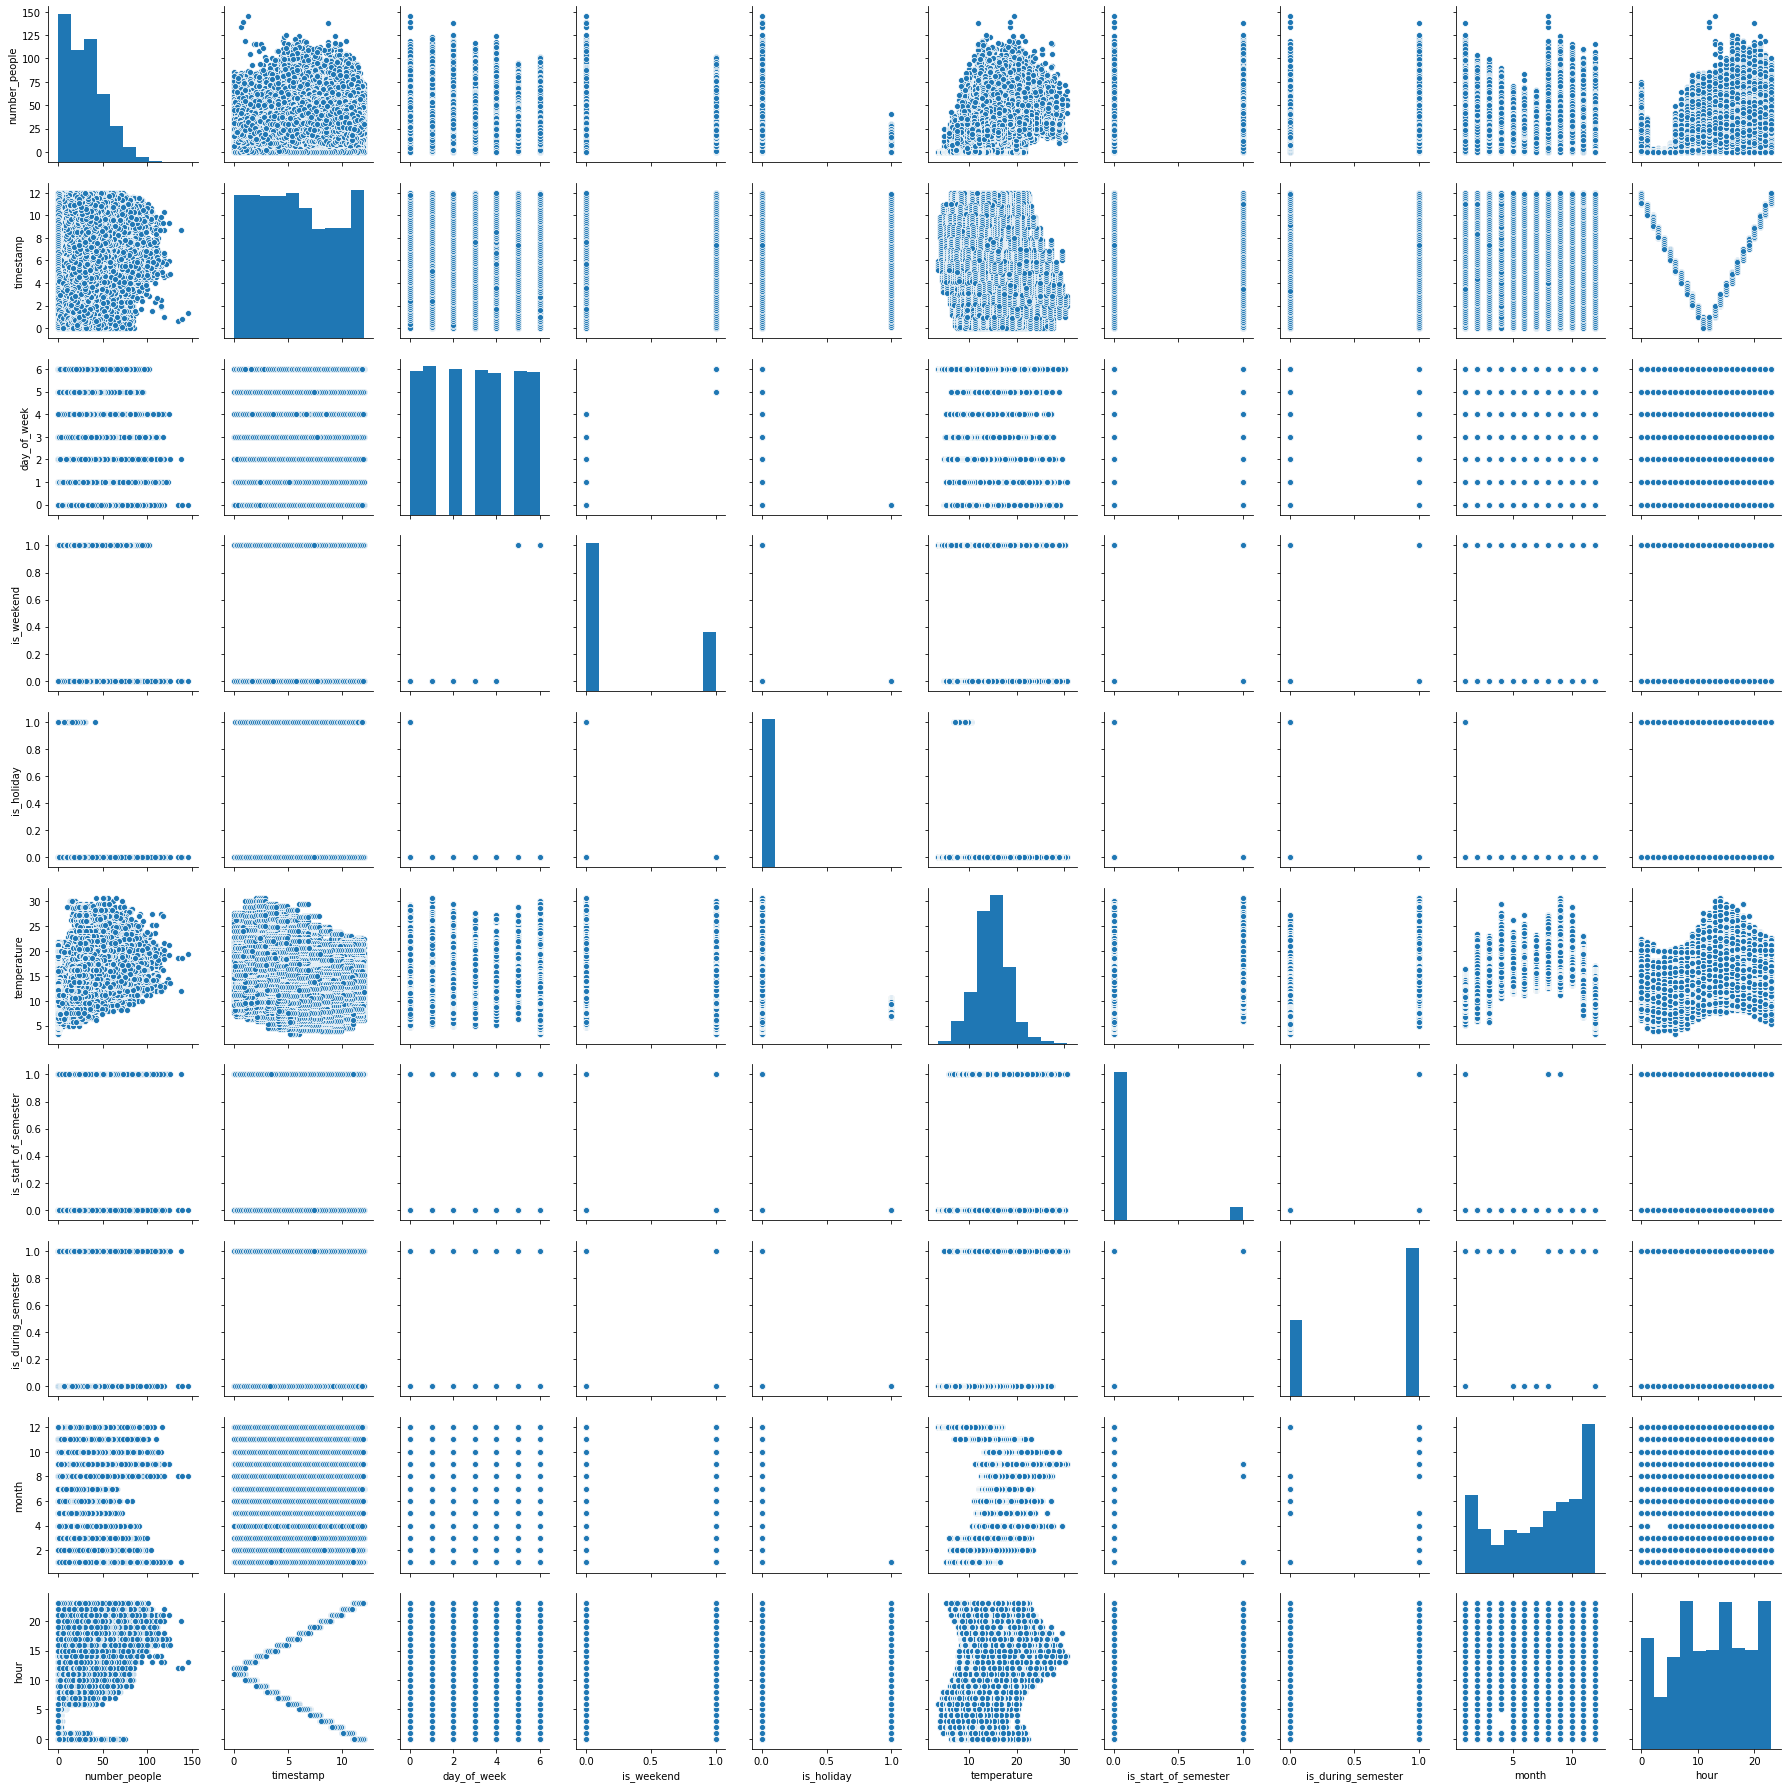

In [27]:
### START CODE HERE :
plt.figsize=(12,12)
sns.pairplot(df)

### END CODE

**TASK: Now analyse scatter plots between `number_people` and all other attributes using a `for loop` to properly know what are the ideal conditions for people to come to the gym** 

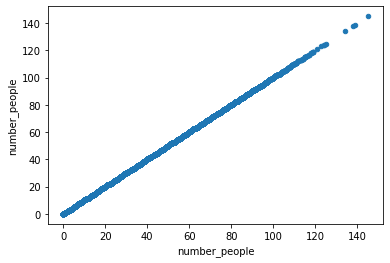

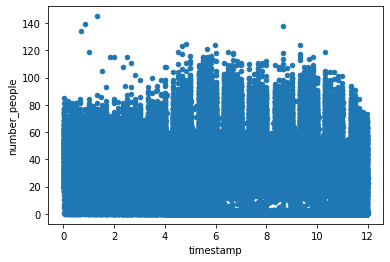

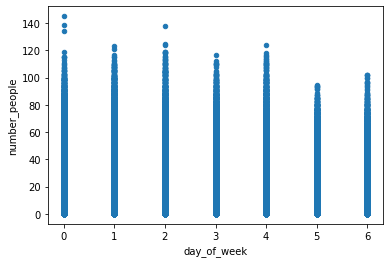

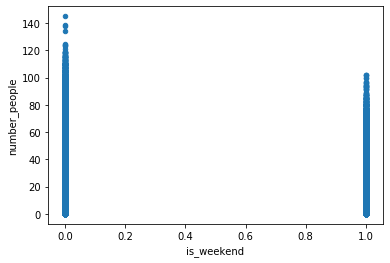

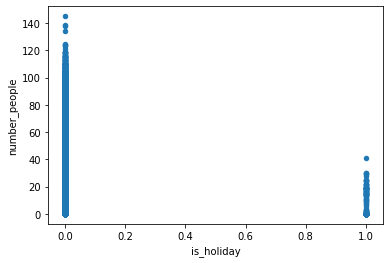

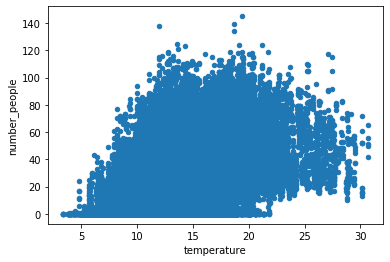

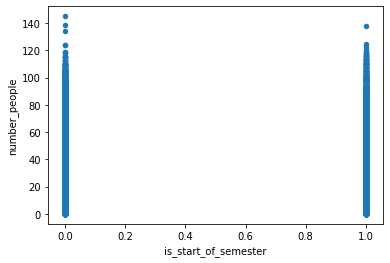

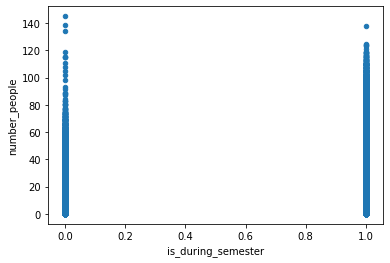

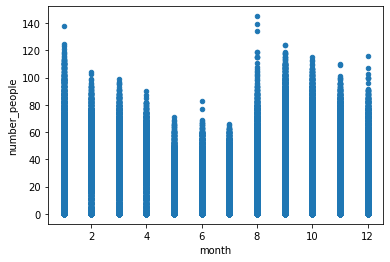

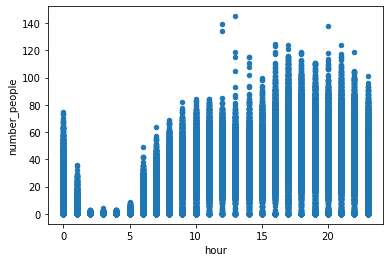

In [32]:
### START CODE HERE 
for i in df.columns : 
    plt.figsize=(10,10)
    df.plot(kind='scatter' , x=i , y='number_people')
    
### END CODE

**Analyse the plots and understand :**
1. **At what time , temperature , week of the day more people come in?**
        
        Answer : During eve time around 6 pm -8 pm , on the first four days of the week when temperature is around 15-20               celsius , people prefer to come

2. **Whether people like to come to the gym in a holiday or a weekend or they prefer to come to gym during working days?**

       Answer : People prefer working days
       
       
3. **Which month is most preferable for people to come to the gym?** 

        Answer: number of people keep decreasing from January to July. Then it increases and remains the highest in August , September , October only to decrease in novemeber and december. June , July has the least number of people and August, September, October the highest

- **Distribution Plots**

**TASK : Plot individual `distplot()` for `temperature` and `number_people` to check out the individual distribution of the attributes** 

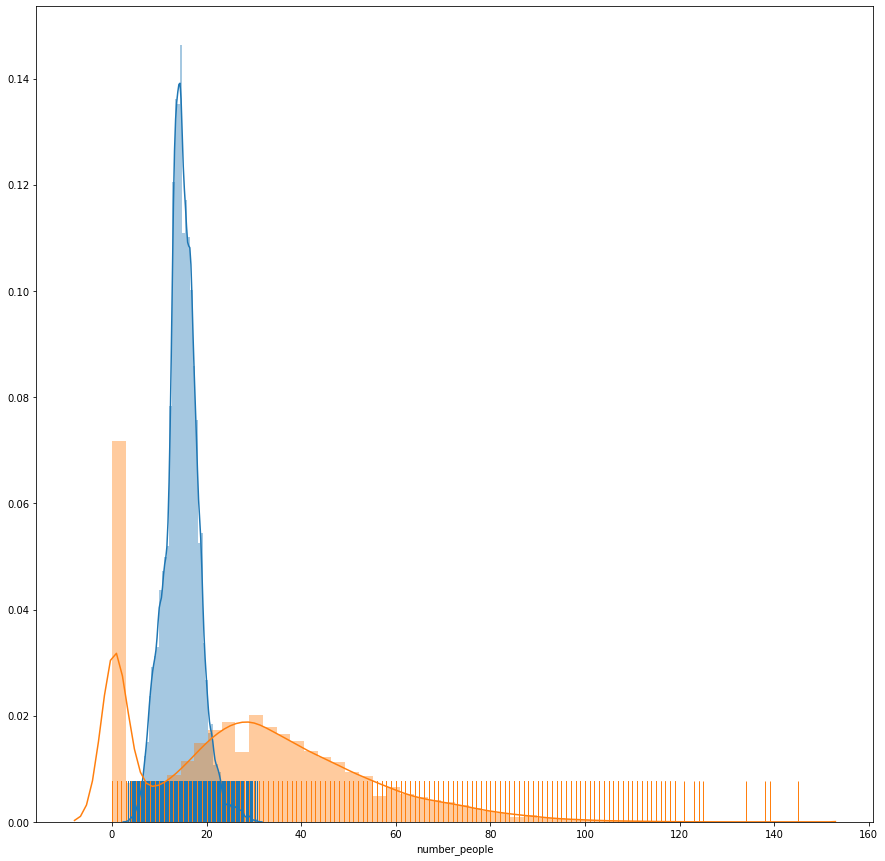

In [40]:
### START CODE HERE : 
plt.figure(figsize=(15,15))
sns.distplot(df.temperature,kde=True,rug=True)
sns.distplot(df.number_people,kde=True,rug=True)

### END CODE

### `2.2` Correlation Matrix

**TASK : Plot a correlation matrix and make it more understandable using `sns.heatmap`**

In [ ]:
### START CODE HERE : 
sns.heatmap(df.corr())

### END CODE HERE 

**Analyse the correlation matrix and understand the different dependencies of attributes on each other** 

## `3.` Processing : 

### `3.1` One hot encoding :
One hot encoding certain attributes to not give any ranking/priority to any instance

**TASK: One Hot Encode following attributes `month` , `hour` , `day of week`**

In [42]:
## YOU CAN USE EITHER get_dummies() OR OneHotEncoder()

### START CODE HERE : 
columns = ["day_of_week", "month", "hour"]
df = pd.get_dummies(df, columns=columns)
df.head()

### END CODE 

,number_people,timestamp,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,day_of_week_0,day_of_week_1,day_of_week_2,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,37,5.003056,0,0,22.088889,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,45,5.337222,0,0,22.088889,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,40,5.504167,0,0,22.088889,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,44,5.671111,0,0,22.088889,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,45,5.838056,0,0,22.088889,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


### `3.2` Feature Scaling :
Some attributes ranges are ver different compared to other values and during PCA implementation this might give a problem thus you need to standardise some of the attributes

**TASK: Using `StandardScaler()` , standardise `temperature` and `timestamp`**

In [55]:
## You can use two individual scalers one for temperature and other for timestamp
## you can use an array type data=df.values and standradise data then split data into X and y
from sklearn.preprocessing import StandardScaler
### START CODE HERE : 
data=df.values
scaler1 = StandardScaler()
scaler1.fit(data[:, 1:2]) # for timestamp
data[:,1:2] = scaler1.transform(data[:,1:2])

scaler2 = StandardScaler()
scaler2.fit(data[:,4:5]) # for temperature
data[:,4:5] = scaler2.transform(data[:,4:5])

### END CODE HERE

## `4.` Splitting the dataset : 

**TASK : Split the dataset into dependent and independent variables and name them y and X respectively** 

In [56]:
### START CODE HERE : 
X = data[:,1:] 
y=data[:,0]
### END CODE

**TASK : Split the X ,y into training and test set**

In [59]:
from sklearn.model_selection import train_test_split
### START CODE HERE : 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### END CODE

## `5.` Principal Component Analysis 

Principal component analysis (PCA) is a technique for reducing the dimensionality of such datasets, increasing interpretability but at the same time minimizing information loss. It does so by creating new uncorrelated variables that successively maximize variance.

**How does it work? :**

- First, a matrix is calculated that summarizes how our variables all relate to one another.

- Secondly , The matrix is broken down into two separate components: direction and magnitude. so its easy to understand the “directions” of the data and its “magnitude” (or how “important” each direction is). The photo below, displays the two main directions in this data: the “red direction” and the “green direction.” In this case, the “red direction” is the more important one as given how the dots are arranged, “red direction”  comprises most of the data and thus is s more important than the “green direction” (Hint: Think of  What would fitting a line of best fit to this data look like?)


<img src="https://miro.medium.com/max/832/1*P8_C9uk3ewpRDtevf9wVxg.png">

- Then the data is transformed to align with these important directions (which are combinations of our original variables). The photo below is the same exact data as above, but transformed so that the x- and y-axes are now the “red direction” and “green direction.”  What would the line of best fit look like here?

<img src="https://miro.medium.com/max/1400/1*V3JWBvxB92Uo116Bpxa3Tw.png">

So PCA tries to find the most important directions in which most of the data is spread and thus reduces it to those components thereby reducing the number of attributes to train and increasing computational speed. A 3D example is given below : 

<img src="https://miro.medium.com/max/1024/1*vfLvJF8wHaQjDaWv6Mab2w.png">

As you can see above a 3D plot is reduced to a 2d plot still retaining most of the data

**Now that you have understood this , lets try to implement it** 

**TASK : Print the PCA fit_transform of X(independent variables)**

In [60]:
from sklearn.decomposition import PCA

### START CODE HERE : 
pca = PCA()
pca.fit_transform(X)

### END CODE

array([[ 1.61428088e+00,  1.22732762e+00, -2.43591352e-01, ...,
         1.69886235e-15, -4.67271011e-16,  1.62349330e-15],
       [ 1.54939077e+00,  1.29428477e+00, -2.44467873e-01, ...,
         1.27643007e-14, -4.81186157e-15, -5.63784500e-15],
       [ 1.51697268e+00,  1.32773551e+00, -2.44905768e-01, ...,
         2.59715552e-16, -1.47206428e-15, -2.46731547e-15],
       ...,
       [-4.37133199e-01,  1.04127634e-01,  8.44909053e-01, ...,
        -2.55895300e-18, -2.29999183e-17, -3.39116044e-17],
       [-4.69874926e-01,  1.37912329e-01,  8.44466786e-01, ...,
        -7.38431351e-17, -1.71133332e-17, -2.05384074e-17],
       [-5.02454833e-01,  1.71530050e-01,  8.44026704e-01, ...,
         1.09237588e-17, -4.37954265e-17, -1.46636816e-17]])

**TASK : Get covariance using `get_covariance()`**

In [61]:
### START CODE HERE (~ 1 line of code) 
pca.get_covariance()
### END CODE HERE

array([[ 1.00001608e+00,  2.94638624e-03,  5.24874895e-04, ...,
         4.72335346e-02,  5.98922655e-02,  7.49381343e-02],
       [ 2.94638624e-03,  2.02857909e-01, -7.27839292e-04, ...,
         2.23593865e-04,  2.57871413e-04,  6.69403189e-05],
       [ 5.24874895e-04, -7.27839292e-04,  2.56643003e-03, ...,
         2.97445864e-05,  7.81547956e-05,  1.06387016e-04],
       ...,
       [ 4.72335346e-02,  2.23593865e-04,  2.97445864e-05, ...,
         4.26934471e-02, -1.99434923e-03, -2.06262424e-03],
       [ 5.98922655e-02,  2.57871413e-04,  7.81547956e-05, ...,
        -1.99434923e-03,  4.26348662e-02, -2.05965537e-03],
       [ 7.49381343e-02,  6.69403189e-05,  1.06387016e-04, ...,
        -2.06262424e-03, -2.05965537e-03,  4.40239275e-02]])

**TASK : Get explained variance using `explained_variance_ratio`**

In [62]:
### START CODE HERE : 
explained_variance=pca.explained_variance_ratio_
explained_variance
### END CODE

array([2.40914216e-01, 1.62250689e-01, 6.63635753e-02, 5.29801936e-02,
       2.80032445e-02, 2.76531337e-02, 2.73517451e-02, 2.71657114e-02,
       2.69965952e-02, 2.38852889e-02, 2.18897838e-02, 1.97070936e-02,
       1.77178307e-02, 1.52831128e-02, 1.32353841e-02, 1.27074540e-02,
       1.22128461e-02, 1.16550699e-02, 9.07258990e-03, 9.03866541e-03,
       8.91912369e-03, 8.76677662e-03, 8.71206507e-03, 8.65668753e-03,
       8.64786105e-03, 8.62761938e-03, 8.61453974e-03, 8.61143499e-03,
       8.60477132e-03, 8.59664993e-03, 8.58816454e-03, 8.57891452e-03,
       8.55976868e-03, 8.54678590e-03, 8.51572781e-03, 8.16987593e-03,
       7.68603484e-03, 6.21774678e-03, 5.52423950e-03, 4.70667586e-03,
       4.61547574e-03, 4.30281087e-03, 2.63500080e-03, 4.58157854e-04,
       5.28683077e-05, 4.75119516e-32, 3.35049566e-33, 2.93094887e-33,
       1.91074852e-33])

**TASK : Plot a bar graph of `explained variance`**

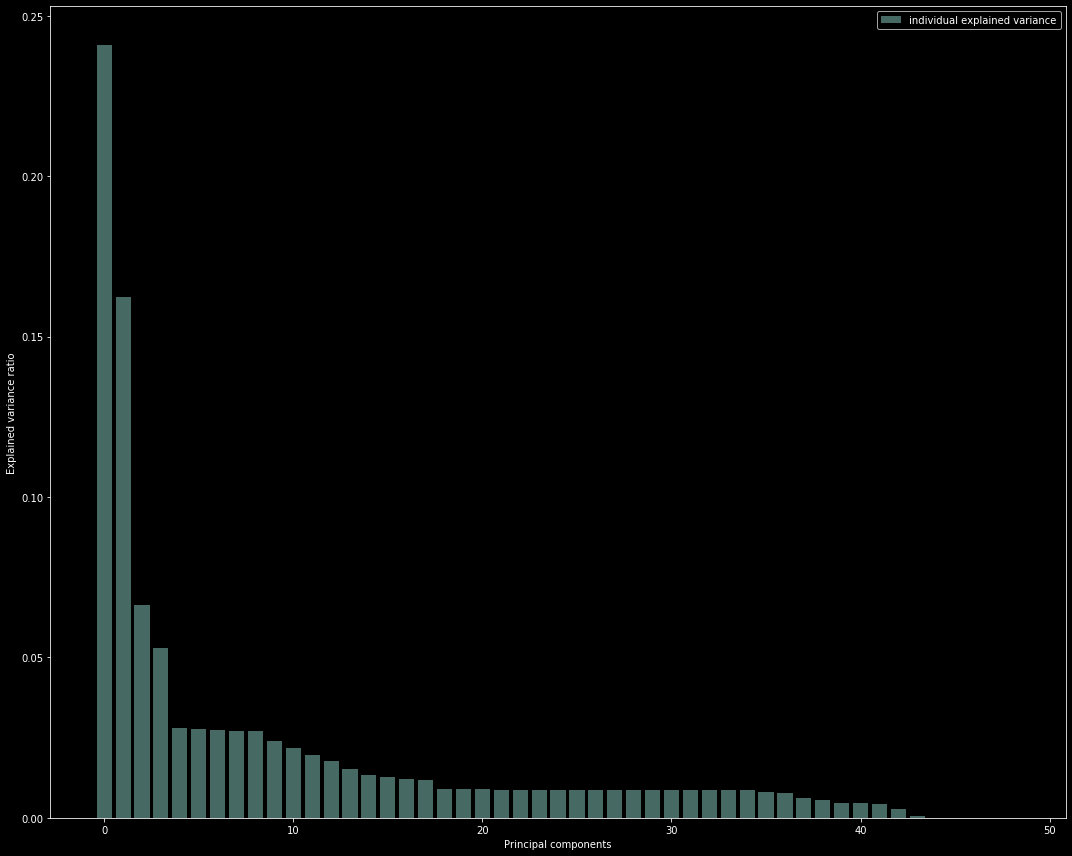

In [66]:
# you can use plt.bar()

### START CODE HERE : 
with plt.style.context('dark_background'):
    plt.figure(figsize=(15,12))

    plt.bar(range(49), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

### END CODE

**Analyse the plot and estimate how many componenets you want to keep**

**TASK : Make a `PCA()` object with n_components =20 and fit-transform in the dataset (X) and assign to a new variable `X_new`**

In [67]:
### START CODE HERE : 
pca=PCA(n_components=20)
X_new=pca.fit_transform(X)
X_new
### END CODE

array([[ 1.61428117,  1.22732788, -0.24353926, ...,  0.0540354 ,
        -0.2025656 , -0.43954282],
       [ 1.54939106,  1.29428504, -0.24441587, ...,  0.05519458,
        -0.20256421, -0.44007975],
       [ 1.51697297,  1.32773578, -0.24485382, ...,  0.05577369,
        -0.20256352, -0.44034799],
       ...,
       [-0.43713296,  0.10412918,  0.84485187, ..., -0.34507294,
        -0.0838626 , -0.05069231],
       [-0.46987468,  0.13791388,  0.84440956, ..., -0.34448805,
        -0.0838619 , -0.05096323],
       [-0.50245459,  0.1715316 ,  0.84396943, ..., -0.34390605,
        -0.0838612 , -0.05123281]])

Now , `X_new` is the dataset for PCA

**TASK : Get Covariance using `get_covariance`**

In [68]:
### START CODE HERE (~1 Line of code)
pca.get_covariance()
### END CODE

array([[ 1.00129237e+00,  2.94548233e-03,  5.28867365e-04, ...,
         4.58671015e-02,  5.82128654e-02,  7.29070294e-02],
       [ 2.94548233e-03,  2.15789791e-01, -6.63307807e-04, ...,
         2.19930850e-04,  2.82096058e-04,  6.37880401e-05],
       [ 5.28867365e-04, -6.63307807e-04,  3.14933590e-02, ...,
        -3.11781178e-05,  3.29428901e-05,  1.53932914e-05],
       ...,
       [ 4.58671015e-02,  2.19930850e-04, -3.11781178e-05, ...,
         3.39939596e-02,  2.63726941e-03,  3.95875544e-03],
       [ 5.82128654e-02,  2.82096058e-04,  3.29428901e-05, ...,
         2.63726941e-03,  3.53654814e-02,  4.71239182e-03],
       [ 7.29070294e-02,  6.37880401e-05,  1.53932914e-05, ...,
         3.95875544e-03,  4.71239182e-03,  3.85287745e-02]])

**TASK : Get the explained variance using `explained_variance_ratio`**

In [69]:
### START CODE HERE :
explained_variance=pca.explained_variance_ratio_
explained_variance

### END CODE

array([0.24091422, 0.16225069, 0.06636357, 0.05298019, 0.0280029 ,
       0.0276529 , 0.0273511 , 0.02716526, 0.02699633, 0.02388464,
       0.02188656, 0.01970515, 0.01771134, 0.01527926, 0.01320713,
       0.01257077, 0.01217741, 0.01164074, 0.00898979, 0.00897225])

**TASK : Plot bar plot of `exlpained variance`**

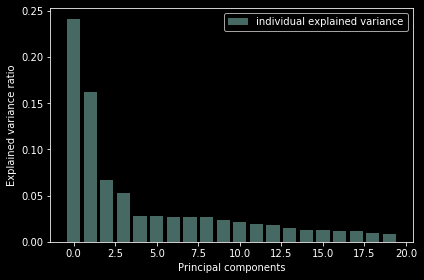

In [70]:
# You can use plt.bar()

### START CODE HERE: 
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(20), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()
    
### END CODE

## `6.` Modelling : Random Forest

To understand Random forest classifier , lets first get a brief idea about Decision Trees in general. Decision Trees are very intuitive and at everyone have used this knowingly or unknowingly at some point . Basically the model keeps sorting them into categories forming a large tree by responses of some questons (decisions) and thats why its called decision tree. An image example would help understand it better :

<img src="https://camo.githubusercontent.com/960e89743476577bd696b3ac16885cf1e1d19ad1/68747470733a2f2f6d69726f2e6d656469756d2e636f6d2f6d61782f313030302f312a4c4d6f4a6d584373516c6369475445796f534e3339672e6a706567">

`Random Forest` : Random forest, like its name implies, consists of a large number of individual decision trees that operate as an [ensemble](https://en.wikipedia.org/wiki/Ensemble_learning) . Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction.

<img src="https://camo.githubusercontent.com/30aec690ddc10fa0ae5d3135d0c7a6b745eb5918/68747470733a2f2f6d69726f2e6d656469756d2e636f6d2f6d61782f313030302f312a56484474566144504e657052676c49417637324246672e6a706567">

The fundamental concept is large number of relatively uncorrelated models (trees) operating as a committee will outperform any of the individual constituent models. Since this dataset has very low correlation between attributes , random forest can be a good option.

In this section you'll have to make a random forest model and train it on both without PCA dataset and with PCA datset to analyse the differences

### `6.1` Random Forest Without PCA


**TASK : Make a random forest model and train it on without PCA training set**

In [71]:
# Establish model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

In [72]:
# Try different numbers of n_estimators and print the scores
# You can use a variable estimators = np.arrange(10,200,10) and then a for loop to take all the values of estimators

### START CODE HERE
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
print(scores)    

### END CODE HERE

[0.9057327462346607, 0.9117474279480381, 0.9133813024607447, 0.9152315957437677, 0.914904877280914, 0.9151021037739102, 0.916378958399465, 0.9159394275789214, 0.9164504889453575, 0.9171257548879801, 0.9163543545951671, 0.9169702767664203, 0.9167048364257149, 0.9169812995023583, 0.9172391951492715, 0.9166905886010961, 0.916738580336024, 0.9174495892671137, 0.9171398494900354]


**TASK : Make a plot between `n_estimator` and `scores` to properly get the best number of estimators**

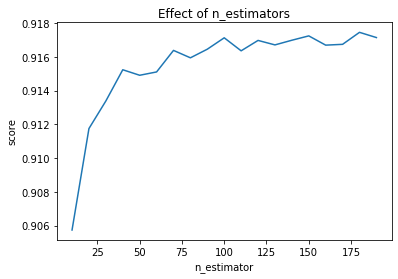

In [73]:
## Use plt.plot

### START CODE HERE : 
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

### END CODE HERE

### `6.2` Random Forest With PCA

**TASK : Split the your dataset with PCA into training and testing set** 

In [74]:
from sklearn.model_selection import train_test_split
### START CODE HERE  :
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=1)
X_train.shape

### END CODE

(46638, 49)

**TASK : Make a random forest model called `model_pca` and fit it into the new X_train and y_train and then print out the random forest scores for dataset with PCA applied to it**

In [75]:
# Establish model
from sklearn.ensemble import RandomForestRegressor
model_pca = RandomForestRegressor()

In [77]:
# You can use different number of estimators
# # You can use a variable estimators = np.arrange(10,200,10) and then a for loop to take all the values of estimators

### START CODE HERE : 

estimators = np.arange(10, 200, 10)
scores_pca = []
for n in estimators:
    model_pca.set_params(n_estimators=n)
    model_pca.fit(X_train_pca, y_train)
    scores_pca.append(model_pca.score(X_test_pca, y_test))
print(scores_pca)    

### END CODE

[0.8917160800343091, 0.8986121697945036, 0.9006923116665195, 0.9020357712023825, 0.9030134107410309, 0.9017528393618054, 0.903981187965153, 0.903179903824172, 0.9048011237087693, 0.9037214847028919, 0.903997853926237, 0.904302654299483, 0.9040323407194504, 0.9051893320911439, 0.9045487425174253, 0.903852195912949, 0.9047856671590416, 0.9043640399721454, 0.9049706287283243]


**TASK : Make a plot between `n_estimator` and `score` and find the best parameter** 

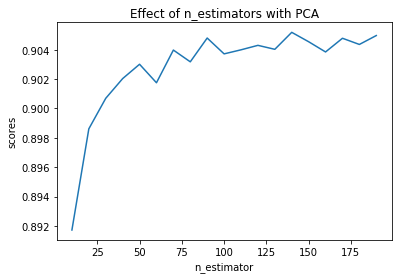

In [80]:
# you can use plt.plot
### START CODE HERE : 

plt.title("Effect of n_estimators with PCA")
plt.xlabel("n_estimator")
plt.ylabel("scores")
plt.plot(estimators, scores_pca)

### END CODE

This completes modelling and now its time to analyse your models

## `7.` Conclusion

Analyse the plots and find the best n_estimator. you can also hypertune other parameter using GridSearchCV or Randomised search. Also understand whether using PCA was beneficial or not , if not try to justify it. 